<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

**Jawab:**

1. PROSES ALGORITMA KNN:
*   Menentukan parameter k, bilangan bulat positif sebagai nearest neighbor(banyak tetangga terdekat
*   Hitung jarak antara data baru dan semua data yg ada di data training
*   Menentukan k tetangga terdekat berdasarkan jarak minimum
*   Tetangga yg memiliki frekuensi terbanyak diambil sebagai nilai prediksi atau hasil klasifikasi dari data baru tersebut

2. KEKURANGAN:
*   Sangat sensitif terhadap data pencilan (data yg bernilai jauh dari sekumpulan data)
*   Jika K nya genap, KNN akan terkecoh kalau label/n terdekatnya berjumlah sama



---

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [9]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [10]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import accuracy_score


k_range = range(2, 21)

# list of distance scores from k_range
list_uniform_score = []

# looping
for k in k_range:
    # KNeighborsClassifier 'uniform'
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'uniform')
    knn.fit(X_train, y_train)
    # prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
    predict = knn.predict(X_test)
    # Score dengan accuracy dari hasil prediksi terhadap data X_test 
    scores = accuracy_score(y_test, predict)
    # append mean dari scores
    list_uniform_score.append(scores.mean())

list_uniform_score

[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

In [11]:
k_range2 = range(2, 21)

# list of distance scores from k_range2
list_distance_score = []

# looping
for k in k_range2:
    # KNeighborsClassifier 'distance'
    knn = KNeighborsClassifier(n_neighbors=k, weights ='distance')
    knn.fit(X_train, y_train)
    # prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
    predict = knn.predict(X_test)
    # Score dengan accuracy dari hasil prediksi terhadap data X_test 
    scores = accuracy_score(y_test, predict)
    # append mean dari scores
    list_distance_score.append(scores.mean())

list_distance_score

[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

Text(0, 0.5, 'Scores')

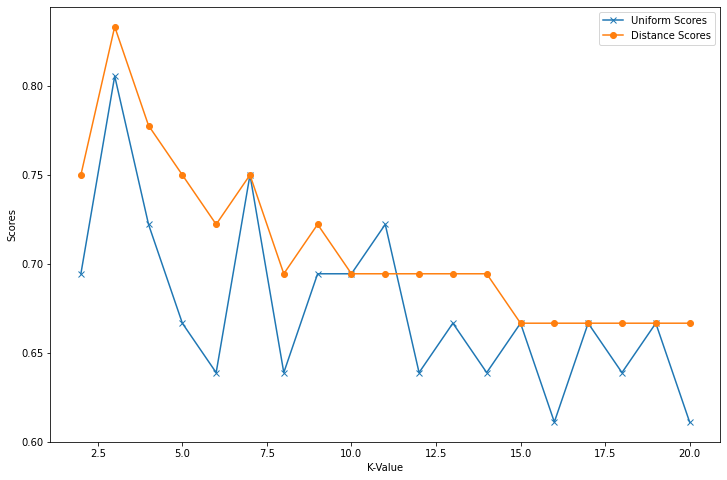

In [12]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(k_range, list_uniform_score, marker='x', label='Uniform Scores')
plt.plot(k_range2, list_distance_score, marker='o', label='Distance Scores')
plt.legend()
plt.xlabel('K-Value')
plt.ylabel('Scores')

Contoh hasil yang di harapkan :


```
Uniform Scores:
[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance scores:
[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]
```



 


![alt text](https://drive.google.com/uc?id=1pppy_BWQsg5tdgOBEU1GgiHSklLLoimt)

---

<h1>Soal 3: Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression(fit_intercept=True)

In [ ]:
X.shape

(50, 4)

In [ ]:
model_lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = model_lr.predict(X)

In [ ]:
model_lr.coef_

array([ 1.5, -5. ,  9. , 10. ])

In [ ]:
model_lr.intercept_

0.5000000016247981